# Wrangle And Analyze Data

## Contents
- [Introduction](#intro)
- [Gathering data](#gather)
- [Assessing data](#assess)
- [Cleaning data](#clean)
- [Storing, Analyzing, and Visualizing](#storing)

<a id='intro'></a>
## Introduction

Our Goal is to wrangle WeRateDogs Twitter data to create interesting and trustworthy analyses and visualizations.

<a id='gather'></a>
## Gathering data

1. **Twitter archive file:** download this file manually by clicking the following link: twitter_archive_enhanced.csv

- **The tweet image predictions**, i.e., what breed of dog (or other object, animal, etc.) is present in each tweet according to a neural network. This file (image_predictions.tsv) is hosted on Udacity's servers and should be downloaded programmatically using the Requests library and the following URL: https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv

- **Twitter API & JSON:** Each tweet's retweet count and favorite ("like") count at minimum, and any additional data you find interesting. Using the tweet IDs in the WeRateDogs Twitter archive, query the Twitter API for each tweet's JSON data using Python's Tweepy library and store each tweet's entire set of JSON data in a file called tweet_json.txt file. 
    Each tweet's JSON data should be written to its own line. Then read this .txt file line by line into a pandas DataFrame with (at minimum) tweet ID, retweet count, and favorite count. 

In [1]:
#Import all packages needed
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import requests
import tweepy 
import json

**1. Twitter archive file**

In [2]:
#Read CSV file 
df_twitter1 = pd.read_csv('twitter-archive-enhanced-2.csv')

In [3]:
#top 5 rows of df 
df_twitter1.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [4]:
df_twitter1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

**2. Tweet image prediction**

In [5]:
#download programatically url given in details
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)
#print(response.content)
with open('image-predictions.tsv', mode ='wb') as file:
    file.write(response.content)

#Read the tsv file
df_image = pd.read_csv('image-predictions.tsv', sep='\t')

In [6]:
df_image.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


**3. Twitter API & JSON**

In [ ]:
#Given in details for those who couldn't get the access and asked us to read and paste it
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = twitter_archive.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

In [7]:
#Json dump isnt working as we have dictonary not an array 
#So get the data into an array to read the data programatically
tweets = []
for line in open('tweet_json.txt', 'r'):
    tweets.append(json.loads(line))
#print(tweets[1])

In [8]:
#from the list above we iterate and get the data we want
sample_list=[]
for e_tweet in tweets:
    tweet_id = e_tweet["id"]
    text = e_tweet["full_text"]
    favorite_count = e_tweet["favorite_count"]
    retweet_count = e_tweet["retweet_count"]
    followers_count = e_tweet["user"]["followers_count"]
    friends_count = e_tweet["user"]["friends_count"]
    #Append the dict to the sample list
    sample_list.append({"tweet_id": str(tweet_id),
                        "text":str(text),
                        "favorite_count": int(favorite_count),
                        "retweet_count": int(retweet_count),
                        "followers_count": int(followers_count),
                        "friends_count": int(friends_count),
                       })
#Convert the list to df
col=["tweet_id","text","favorite_count","retweet_count","followers_count", "friends_count"]
df_json = pd.DataFrame(sample_list, columns = col)

In [9]:
#Top 5 rows
df_json.head()

,tweet_id,text,favorite_count,retweet_count,followers_count,friends_count
0,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,39467,8853,3200889,104
1,892177421306343426,This is Tilly. She's just checking pup on you....,33819,6514,3200889,104
2,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,25461,4328,3200889,104
3,891689557279858688,This is Darla. She commenced a snooze mid meal...,42908,8964,3200889,104
4,891327558926688256,This is Franklin. He would like you to stop ca...,41048,9774,3200889,104


<a id='assess'></a>
## Assessing data

In [10]:
df_twitter1

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [11]:
df_image

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [12]:
df_json

,tweet_id,text,favorite_count,retweet_count,followers_count,friends_count
0,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,39467,8853,3200889,104
1,892177421306343426,This is Tilly. She's just checking pup on you....,33819,6514,3200889,104
2,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,25461,4328,3200889,104
3,891689557279858688,This is Darla. She commenced a snooze mid meal...,42908,8964,3200889,104
4,891327558926688256,This is Franklin. He would like you to stop ca...,41048,9774,3200889,104
5,891087950875897856,Here we have a majestic great white breaching ...,20562,3261,3200889,104
6,890971913173991426,Meet Jax. He enjoys ice cream so much he gets ...,12041,2158,3200889,104
7,890729181411237888,When you watch your owner call another dog a g...,56848,16716,3200889,104
8,890609185150312448,This is Zoey. She doesn't want to be one of th...,28226,4429,3200889,104
9,890240255349198849,This is Cassie. She is a college pup. Studying...,32467,7711,3200889,104


## Practical Analysis

In [13]:
df_twitter1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [14]:
sum(df_twitter1.duplicated())

0

In [15]:
sum(df_twitter1.tweet_id.duplicated())

0

In [16]:
df_twitter1["rating_numerator"].value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [17]:
df_twitter1["rating_denominator"].value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [ ]:
pd.set_option('display.max_colwidth', -1)
df_twitter1[df_twitter1["rating_denominator"]!=10]["text"]

In [20]:
sum(df_twitter1.retweeted_status_id.notnull())

181

In [21]:
df_twitter1["source"].value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                        91  
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                     33  
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>    11  
Name: source, dtype: int64

In [22]:
df_image.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [23]:
sum(df_image.tweet_id.duplicated())

0

In [24]:
sum(df_image.jpg_url.duplicated())

66

In [25]:
df_image.p1.value_counts()

golden_retriever             150
Labrador_retriever           100
Pembroke                     89 
Chihuahua                    83 
pug                          57 
chow                         44 
Samoyed                      43 
toy_poodle                   39 
Pomeranian                   38 
malamute                     30 
cocker_spaniel               30 
French_bulldog               26 
Chesapeake_Bay_retriever     23 
miniature_pinscher           23 
seat_belt                    22 
Staffordshire_bullterrier    20 
Siberian_husky               20 
German_shepherd              20 
Cardigan                     19 
web_site                     19 
Eskimo_dog                   18 
Maltese_dog                  18 
beagle                       18 
teddy                        18 
Shetland_sheepdog            18 
Shih-Tzu                     17 
Rottweiler                   17 
Lakeland_terrier             17 
Italian_greyhound            16 
kuvasz                       16 
          

In [26]:
df_image.p2.value_counts()

Labrador_retriever                104
golden_retriever                  92 
Cardigan                          73 
Chihuahua                         44 
Pomeranian                        42 
Chesapeake_Bay_retriever          41 
French_bulldog                    41 
toy_poodle                        37 
cocker_spaniel                    34 
Siberian_husky                    33 
miniature_poodle                  33 
beagle                            28 
Eskimo_dog                        27 
Pembroke                          27 
collie                            27 
kuvasz                            26 
Italian_greyhound                 22 
Pekinese                          21 
American_Staffordshire_terrier    21 
toy_terrier                       20 
malinois                          20 
miniature_pinscher                20 
Samoyed                           20 
chow                              20 
Boston_bull                       19 
Norwegian_elkhound                19 
Staffordshir

In [27]:
df_image.p3.value_counts()

Labrador_retriever                79
Chihuahua                         58
golden_retriever                  48
Eskimo_dog                        38
kelpie                            35
kuvasz                            34
chow                              32
Staffordshire_bullterrier         32
beagle                            31
cocker_spaniel                    31
Pomeranian                        29
toy_poodle                        29
Pekinese                          29
Pembroke                          27
Great_Pyrenees                    27
Chesapeake_Bay_retriever          27
French_bulldog                    26
malamute                          26
American_Staffordshire_terrier    24
pug                               23
Cardigan                          23
basenji                           21
toy_terrier                       20
bull_mastiff                      20
Siberian_husky                    19
Boston_bull                       17
Shetland_sheepdog                 17
b

In [28]:
sum(df_image.p1.isnull())

0

In [29]:
df_image.p1_dog.value_counts()

True     1532
False    543 
Name: p1_dog, dtype: int64

In [30]:
df_image.p2_dog.value_counts()

True     1553
False    522 
Name: p2_dog, dtype: int64

In [31]:
df_image.p3_dog.value_counts()

True     1499
False    576 
Name: p3_dog, dtype: int64

In [32]:
df_image.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [33]:
df_json.sample(5)

,tweet_id,text,favorite_count,retweet_count,followers_count,friends_count
1421,697995514407682048,"""Dammit hooman quit playin I jus wanna wheat thin"" 11/10 https://t.co/yAASRDPJnQ",1665,372,3200950,104
2265,667524857454854144,Another topnotch dog. His name is Big Jumpy Rat. Massive ass feet. Superior tail. Jumps high af. 12/10 great pup https://t.co/seESNzgsdm,1798,1198,3201016,104
68,879050749262655488,This is Steven. He has trouble relating to other dogs. Quite shy. Neck longer than average. Tropical probably. 11/10 would still pet https://t.co/2mJCDEJWdD,23022,4941,3200892,104
218,850145622816686080,This is Riley. He's making new friends. Jubilant as h*ck for the fun times ahead. 11/10 for all pups pictured https://t.co/PCX25VV78l,17519,4244,3200891,104
1232,712717840512598017,Please don't send in any more polar bears. We only rate dogs. Thank you... 10/10 https://t.co/83RGhdIQz2,13474,5616,3200947,104


In [34]:
df_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 6 columns):
tweet_id           2354 non-null object
text               2354 non-null object
favorite_count     2354 non-null int64
retweet_count      2354 non-null int64
followers_count    2354 non-null int64
friends_count      2354 non-null int64
dtypes: int64(4), object(2)
memory usage: 110.4+ KB


In [35]:
df_json.retweet_count.value_counts()

1972     5
3652     5
83       5
146      4
61       4
748      4
2243     4
336      4
183      4
179      4
1207     4
265      4
115      4
71       4
1124     4
542      4
819      4
577      4
516      4
397      3
619      3
661      3
2511     3
261      3
431      3
482      3
403      3
557      3
572      3
576      3
        ..
2088     1
1271     1
2030     1
43       1
5365     1
4143     1
3316     1
1263     1
16439    1
2104     1
4125     1
27       1
4121     1
4119     1
4079     1
1285     1
10226    1
8183     1
2042     1
11524    1
6148     1
7        1
1281     1
2060     1
1825     1
8209     1
19       1
2068     1
30742    1
0        1
Name: retweet_count, Length: 1724, dtype: int64

In [36]:
df_json.describe()

,favorite_count,retweet_count,followers_count,friends_count
count,2354.000000,2354.000000,2.354000e+03,2354.0
mean,8080.968564,3164.797366,3.200942e+06,104.0
std,11814.771334,5284.770364,4.457302e+01,0.0
min,0.000000,0.000000,3.200799e+06,104.0
25%,1415.000000,624.500000,3.200898e+06,104.0
50%,3603.500000,1473.500000,3.200945e+06,104.0
75%,10122.250000,3652.000000,3.200953e+06,104.0
max,132810.000000,79515.000000,3.201018e+06,104.0


## Quality

### Twitter Archive

1. Data contains 181 retweeted user so we need to clean that 181 records from the dataset.<br/>
2. tweet_id data type is int we need to change it to str.<br/>
3. Timestamp data stype should be changed from str to datetime.<br/> 
4. Html code in source column should be cleaned.
5. rating_numerator and rating_denominator datatypes should be changed.
6. name has many unaccuracy and diffrent null values.
7. very much less data in some columns.
8. remove unwanted columns.

### Image Prediction

1. Drop jpg_url duplicated columns.<br/>
2. Dog names have "_" instead of space.
3. Tweet_id data type should be changed from int to str.
4. remove unwanted columns.<br/>

### Tweet Json

1. Remove unwanted column

## Tidiness

1. A Single rating Column could help in better understanding.
2. Set the rating to correct values where denominator was not equal to 10.
3. 4 Columns can be merged to a single column.
4. All tables should be part of one dataset.<br/>


<a id='clean'></a>
## Cleaning Data

In [37]:
df_ta = df_twitter1.copy()
df_im = df_image.copy()
df_tj = df_json.copy()

**Twitter_Archive**<br/>
1. Data contains 181 retweeted user so we need to clean that 181 records from the dataset

In [38]:
# Keep rows where 'retweeted_status_id' is NaN
df_ta=df_ta[df_ta["retweeted_status_id"].isnull()]

In [39]:
#Test
sum(df_ta.retweeted_status_id.notnull())

0

**Twitter_Archive**<br/>
2. tweet_id data type is int we need to change it to str.

In [40]:
#convert the data type
df_ta["tweet_id"]=df_ta["tweet_id"].astype(str)

In [41]:
#test
df_ta.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2175 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null object
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
dtypes: float64(4), int64(2), object(

**Twitter Archive**<br/>
3. Timestamp data stype should be changed from str to datetime.

In [42]:
# Remove the time zone information from 'timestamp' column and change the data type to datetime
# https://stackoverflow.com/questions/25789445/pandas-make-new-column-from-string-slice-of-another-column
# https://stackoverflow.com/questions/32204631/how-to-convert-string-to-datetime-format-in-pandas-python
df_ta['timestamp'] = df_ta['timestamp'].str[:-6]
df_ta['timestamp'] = df_ta['timestamp'].astype('datetime64[ns]')

In [43]:
#Test
df_ta.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2175 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null datetime64[ns]
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
dtypes: datetime64[ns](1), fl

**Twitter_Archive**<br/>
4. Html code in source column should be cleaned.

In [44]:
#find the different types of sources
df_ta["source"].value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2042
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                        91  
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                     31  
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>    11  
Name: source, dtype: int64

In [45]:
#extract the text from source 
ind=df_ta["source"].str.find(">")
ind=np.array(ind)
ind=ind+1
m=[]
for data,i in zip(df_ta["source"],ind):
    k=data[i:-4]
    m.append(k)
m=np.array(m)
df_ta["source"]=m.copy()
df_ta["source"].value_counts()

Twitter for iPhone     2042
Vine - Make a Scene    91  
Twitter Web Client     31  
TweetDeck              11  
Name: source, dtype: int64

In [46]:
#test
df_ta["source"].value_counts()

Twitter for iPhone     2042
Vine - Make a Scene    91  
Twitter Web Client     31  
TweetDeck              11  
Name: source, dtype: int64

**Twitter Archive**<br/>
5. rating_numerator and rating_denominator datatypes should be changed.

In [47]:
# Convert the datatypes to float
df_ta[['rating_numerator', 'rating_denominator']] = df_ta[['rating_numerator','rating_denominator']].astype(float)

In [48]:
#test
df_ta.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2175 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null datetime64[ns]
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null float64
rating_denominator            2175 non-null float64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
dtypes: datetime64[ns](1)

**Twitter Archive**<br/>
6. name has many unaccuracy and diffrent null values.
7. very much less data in some columns.
8. remove unwanted columns.

In [49]:
#remove the columns which have veryu less data and mnot usefull for us
df_ta.drop(["in_reply_to_status_id",
            "in_reply_to_user_id",
            "retweeted_status_id",
            "retweeted_status_user_id",
            "retweeted_status_timestamp",
            "expanded_urls","name"],axis=1,inplace=True)

In [50]:
#test
df_ta.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 10 columns):
tweet_id              2175 non-null object
timestamp             2175 non-null datetime64[ns]
source                2175 non-null object
text                  2175 non-null object
rating_numerator      2175 non-null float64
rating_denominator    2175 non-null float64
doggo                 2175 non-null object
floofer               2175 non-null object
pupper                2175 non-null object
puppo                 2175 non-null object
dtypes: datetime64[ns](1), float64(2), object(7)
memory usage: 186.9+ KB


**Image Prediction**<br/>
1. Drop jpg_url duplicated columns.<br/>

In [51]:
#find the number of duplicates
sum(df_im.jpg_url.duplicated())

66

In [52]:
#drop duplicates 
df_im.jpg_url.drop_duplicates(inplace=True)

In [53]:
#test
sum(df_im.jpg_url.duplicated())

0

**Image Prediction**<br/>
2. Dog names have "_" instead of space.

In [54]:
#replace the "_" with space in names of dogs
df_im["p1"]=df_im["p1"].str.replace("_"," ")
df_im["p2"]=df_im["p2"].str.replace("_"," ")
df_im["p3"]=df_im["p3"].str.replace("_"," ")


In [55]:
#test
df_im.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh springer spaniel,0.465074,True,collie,0.156665,True,Shetland sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature pinscher,0.074192,True,Rhodesian ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian ridgeback,0.408143,True,redbone,0.360687,True,miniature pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


**Image Prediction**<br/>
3. Tweet_id data type should be changed from int to str.

In [56]:
#Convert the data type to str
df_im["tweet_id"]=df_im["tweet_id"].astype(str)

In [57]:
#Test
df_im.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


**Image Prediction**<br/>
4. remove unwanted columns.<br/>

In [58]:
#drop the img num column
df_im.drop(["img_num"],axis=1,inplace=True)

In [59]:
#test
df_im.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 11 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), object(5)
memory usage: 135.8+ KB


**Tweet Json**<br/>
1. Remove unwanted column

In [60]:
df_tj.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 6 columns):
tweet_id           2354 non-null object
text               2354 non-null object
favorite_count     2354 non-null int64
retweet_count      2354 non-null int64
followers_count    2354 non-null int64
friends_count      2354 non-null int64
dtypes: int64(4), object(2)
memory usage: 110.4+ KB


In [61]:
#remove the columns with drop
df_tj.drop(["text","friends_count"],axis=1,inplace=True)

In [62]:
#test
df_tj.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 4 columns):
tweet_id           2354 non-null object
favorite_count     2354 non-null int64
retweet_count      2354 non-null int64
followers_count    2354 non-null int64
dtypes: int64(3), object(1)
memory usage: 73.6+ KB


**Tidiness**<br/>
1. A Single rating Column could help in better understanding.

In [63]:
#Create a new column with rating
df_ta["rating"]=df_ta["rating_numerator"]/df_ta["rating_denominator"]

In [64]:
#test
df_ta.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 11 columns):
tweet_id              2175 non-null object
timestamp             2175 non-null datetime64[ns]
source                2175 non-null object
text                  2175 non-null object
rating_numerator      2175 non-null float64
rating_denominator    2175 non-null float64
doggo                 2175 non-null object
floofer               2175 non-null object
pupper                2175 non-null object
puppo                 2175 non-null object
rating                2175 non-null float64
dtypes: datetime64[ns](1), float64(3), object(7)
memory usage: 203.9+ KB


**Tidiness**<br/>
2. Set the rating to correct values where denominator was not equal to 10.

In [65]:
#get the index of the denominator where it is not equal to 10
pd.set_option('display.max_colwidth', -1)
df_ta[df_ta["rating_denominator"]!=10]["text"]

313     @jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho                                                                       
342     @docmisterio account started on 11/15/15                                                                                                                                 
433     The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd                                                                      
516     Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx
902     Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE                                                                                           
1068    After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second e

In [66]:
#set the denominators to correct values
df_ta.loc[313,"rating"]=13/10
df_ta.loc[342,"rating"]=np.NaN
df_ta.loc[516,"rating"]=np.NaN
df_ta.loc[1086,"rating"]=14/10
df_ta.loc[1165,"rating"]=13/10
df_ta.loc[1202,"rating"]=11/10
df_ta.loc[1662,"rating"]=10/10
df_ta.loc[2335,"rating"]=9/10

In [67]:
#test
df_ta.rating.value_counts()

1.200000      503
1.000000      444
1.100000      432
1.300000      309
0.900000      157
0.800000      98 
0.700000      53 
1.400000      44 
0.500000      36 
0.600000      32 
0.300000      19 
0.400000      15 
0.200000      10 
0.100000      7  
0.000000      2  
42.000000     2  
0.818182      1  
2.700000      1  
1.700000      1  
18.200000     1  
177.600000    1  
1.250000      1  
7.500000      1  
1.500000      1  
66.600000     1  
2.600000      1  
Name: rating, dtype: int64

Drop the NaN

In [68]:
#drop the nans
df_ta.dropna(inplace=True)

In [69]:
#test
df_ta.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2173 entries, 0 to 2355
Data columns (total 11 columns):
tweet_id              2173 non-null object
timestamp             2173 non-null datetime64[ns]
source                2173 non-null object
text                  2173 non-null object
rating_numerator      2173 non-null float64
rating_denominator    2173 non-null float64
doggo                 2173 non-null object
floofer               2173 non-null object
pupper                2173 non-null object
puppo                 2173 non-null object
rating                2173 non-null float64
dtypes: datetime64[ns](1), float64(3), object(7)
memory usage: 203.7+ KB


**Tidiness**<br/>
3. 4 Columns can be merged to a single column.

In [70]:
#concat all the name of columns
df_ta["dog_kind"]=df_ta["doggo"]+df_ta["floofer"]+df_ta["pupper"]+df_ta["puppo"]

In [71]:
#find the names if present else None 
sam_list=[]
for dog in df_ta["dog_kind"]:
    if "doggo" in dog:
        sam_list.append("doggo")
    elif "floofer" in dog:
        sam_list.append("floofer")
    elif "pupper" in dog:
        sam_list.append("pupper")
    elif "puppo" in dog:
        sam_list.append("puppo")
    else:
        sam_list.append("None")
sam_list=np.array(sam_list)

In [72]:
#copy to the df
df_ta["dog_kind"]=sam_list.copy()

In [73]:
#test
df_ta["dog_kind"].head()

0    None
1    None
2    None
3    None
4    None
Name: dog_kind, dtype: object

**Tidiness**<br/>
4. All tables should be part of one dataset.<br/>

In [74]:
#Create a new dataframe that merge df_ta and df_im data set on tweet_id as primary key
df_t1 = pd.merge(df_ta,df_im,how = 'left', on = ['tweet_id'])

In [75]:
#test
df_t1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2173 entries, 0 to 2172
Data columns (total 22 columns):
tweet_id              2173 non-null object
timestamp             2173 non-null datetime64[ns]
source                2173 non-null object
text                  2173 non-null object
rating_numerator      2173 non-null float64
rating_denominator    2173 non-null float64
doggo                 2173 non-null object
floofer               2173 non-null object
pupper                2173 non-null object
puppo                 2173 non-null object
rating                2173 non-null float64
dog_kind              2173 non-null object
jpg_url               1993 non-null object
p1                    1993 non-null object
p1_conf               1993 non-null float64
p1_dog                1993 non-null object
p2                    1993 non-null object
p2_conf               1993 non-null float64
p2_dog                1993 non-null object
p3                    1993 non-null object
p3_conf             

In [76]:
#Create a new dataframe that merge df_t1 and df_tj data set
df = pd.merge(df_t1,df_tj,how = 'left', on = ['tweet_id'])

In [77]:
#Test
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2173 entries, 0 to 2172
Data columns (total 25 columns):
tweet_id              2173 non-null object
timestamp             2173 non-null datetime64[ns]
source                2173 non-null object
text                  2173 non-null object
rating_numerator      2173 non-null float64
rating_denominator    2173 non-null float64
doggo                 2173 non-null object
floofer               2173 non-null object
pupper                2173 non-null object
puppo                 2173 non-null object
rating                2173 non-null float64
dog_kind              2173 non-null object
jpg_url               1993 non-null object
p1                    1993 non-null object
p1_conf               1993 non-null float64
p1_dog                1993 non-null object
p2                    1993 non-null object
p2_conf               1993 non-null float64
p2_dog                1993 non-null object
p3                    1993 non-null object
p3_conf             

In [78]:
#remove rows with null values 
#df = df.dropna(how='any',axis=0)

In [79]:
#drop unwanted columns
df.drop(["rating_numerator","rating_denominator","doggo","floofer","pupper","puppo",],axis=1,inplace=True)

In [80]:
#test
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2173 entries, 0 to 2172
Data columns (total 19 columns):
tweet_id           2173 non-null object
timestamp          2173 non-null datetime64[ns]
source             2173 non-null object
text               2173 non-null object
rating             2173 non-null float64
dog_kind           2173 non-null object
jpg_url            1993 non-null object
p1                 1993 non-null object
p1_conf            1993 non-null float64
p1_dog             1993 non-null object
p2                 1993 non-null object
p2_conf            1993 non-null float64
p2_dog             1993 non-null object
p3                 1993 non-null object
p3_conf            1993 non-null float64
p3_dog             1993 non-null object
favorite_count     2173 non-null int64
retweet_count      2173 non-null int64
followers_count    2173 non-null int64
dtypes: datetime64[ns](1), float64(4), int64(3), object(11)
memory usage: 339.5+ KB


<a id='storing'></a>
## Storing, Analyzing, and Visualizing Data

In [81]:
#Store the DataFrame in a CSV file
df.to_csv('twitter_archive_master.csv', index=False, encoding = 'utf-8')

### Comparing the predictions of Neural Network

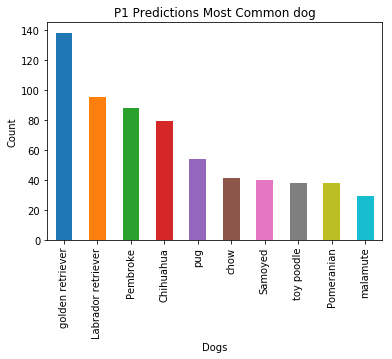

In [82]:
df_p1=df[df["p1_dog"]==True].p1.value_counts().head(10).plot(kind="bar")
plt.xlabel("Dogs")
plt.ylabel("Count")
plt.title("P1 Predictions Most Common dog");

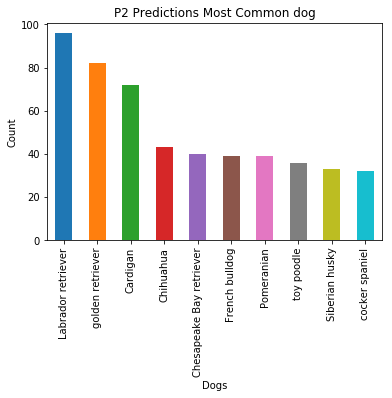

In [83]:
df_p2=df[df["p2_dog"]==True].p2.value_counts().head(10).plot(kind="bar")
plt.xlabel("Dogs")
plt.ylabel("Count")
plt.title("P2 Predictions Most Common dog");

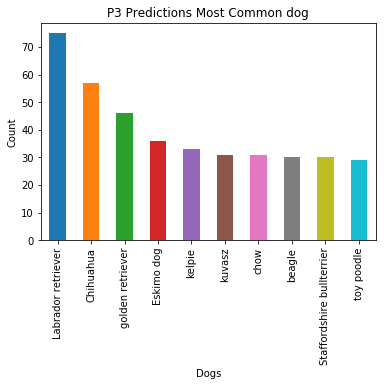

In [84]:
df_p3=df[df["p3_dog"]==True].p3.value_counts().head(10).plot(kind="bar")
plt.xlabel("Dogs")
plt.ylabel("Count")
plt.title("P3 Predictions Most Common dog");

As we can see the top predicton of the neural netwrok has Golden Retriver the most and the second and third predictions has Labrador Retriever 

In [85]:
df.corr()

,rating,p1_conf,p2_conf,p3_conf,favorite_count,retweet_count,followers_count
rating,1.000000,-0.008974,-0.013783,-0.004918,0.008385,0.011041,-0.037092
p1_conf,-0.008974,1.000000,-0.509287,-0.707914,0.079873,0.054727,-0.082139
p2_conf,-0.013783,-0.509287,1.000000,0.480582,-0.021804,-0.018592,-0.005511
p3_conf,-0.004918,-0.707914,0.480582,1.000000,-0.053842,-0.044317,0.033689
favorite_count,0.008385,0.079873,-0.021804,-0.053842,1.000000,0.911715,-0.527950
retweet_count,0.011041,0.054727,-0.018592,-0.044317,0.911715,1.000000,-0.347159
followers_count,-0.037092,-0.082139,-0.005511,0.033689,-0.527950,-0.347159,1.000000


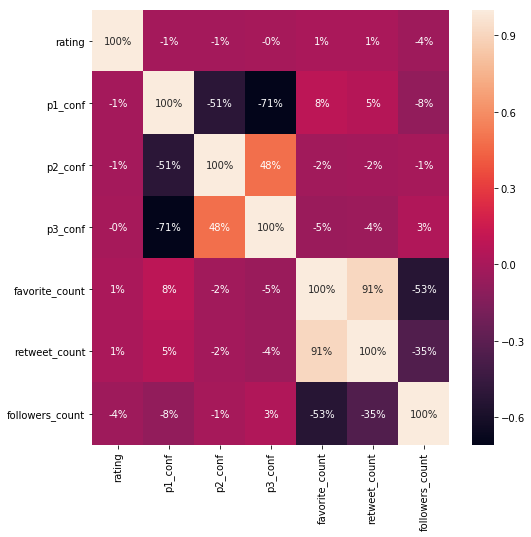

In [86]:
plt.figure(figsize=(16,16))
sns.heatmap(df.corr(), annot=True, fmt='.0%');

As we can seee that there is a correlation between retweet and favorite count we can try to get some insights

### Favorite Count vs. Retweet Count

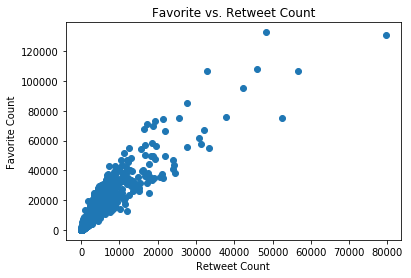

In [87]:
# Plot scatterplot of retweet vs favorite count
plt.scatter(x=df["retweet_count"],y=df["favorite_count"])
plt.title('Favorite vs. Retweet Count')
plt.xlabel('Retweet Count')
plt.ylabel('Favorite Count');

So, we can see that there is a positive corelation between the Favourite count and retweet count.

## Most used source

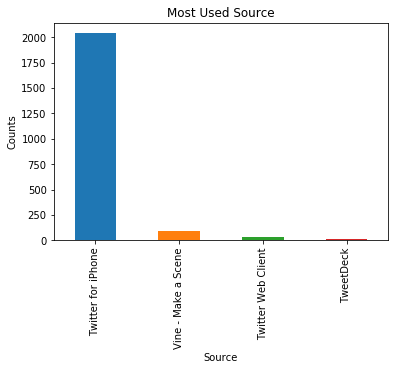

In [88]:
df["source"].value_counts().plot(kind="bar")
plt.xlabel("Source")
plt.ylabel("Counts")
plt.title("Most Used Source");

As we can see the most of the source is through iphone when compared to others.

### Most seen Dog Stages

In [95]:
dog_list=df["dog_kind"].value_counts()
dog_list

None       1829
pupper     224 
doggo      87  
puppo      24  
floofer    9   
Name: dog_kind, dtype: int64

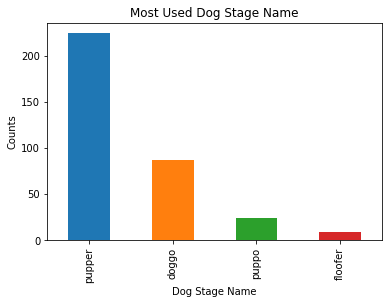

In [96]:
dog_list[1:].plot(kind="bar")
plt.xlabel("Dog Stage Name")
plt.ylabel("Counts")
plt.title("Most Used Dog Stage Name");

As we can see that from the available data pupper is the most used dog stages